In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
#importer nos données
#train_X=pd.read_csv('train_X.csv')
##train_y=pd.read_csv('train_y.csv')
#test_X=pd.read_csv('test_X.csv')
#test_y=pd.read_csv('test_y.csv')
data=pd.read_csv('Base.csv')
data=data.drop('Unnamed: 0',axis=1)

In [3]:
train=data
train =train[train['montant_sollicite']<3000000]
train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
#train['a_deja_au_pret'] = train['nbr_credits_octroyes'].apply(lambda x: 0 if x == 0 else 1)
train['rapport_montant'] = ((train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite'])/(train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1))
#train=train.drop('nbr_credits_octroyes',axis=1)
train=train.drop('nbr_credits_rembourses',axis=1)


C:\Users\HOME\AppData\Local\Temp\ipykernel_14432\2839177602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rapport_rembourse'] = train['nbr_credits_rembourses'] /train['nbr_credits_octroyes'].replace(0, 1)
C:\Users\HOME\AppData\Local\Temp\ipykernel_14432\2839177602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rapport_montant'] = ((train['montant_credits_accorde']/train['nbr_credits_octroyes'].replace(0, 1)) - train['montant_sollicite'])/(train['montant_credits_accorde']/train['nbr_

In [4]:

X=train.drop('a_dette_encours',axis=1)
y=train['a_dette_encours']
X=X.drop('sexe',axis=1)
X=X.drop('r',axis=1)
X=X.drop('secteur_activite',axis=1)
X=X.drop('profession',axis=1)
#X=X.drop('ssecteur_activite',axis=1)
X=X.drop('age',axis=1)
X=X.drop('nbr_echeances',axis=1)
X=X.drop('montant_credits_accorde',axis=1)
X=X.drop('anciennete_agence',axis=1)
#X=X.drop('duree_pret_souhaitee',axis=1)

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from xgboost import XGBClassifier
from sklearn import metrics

# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    #'max_depth': 8, 'learning_rate': 0.1521144137278809, 'n_estimators': 65, 'subsample': 0.7423868279218212, 'colsample_bytree': 0.9557791298962521, 'lambda': 0.7076288035899443, 'alpha': 0.40281399366018356
'max_depth': 6, 'learning_rate': 0.1880467368488196, 'n_estimators': 129, 'subsample': 0.6498664661710195, 'colsample_bytree': 0.6305435116112322, 'lambda': 0.4460738105290741, 'alpha': 0.38831567013434054}
    #'max_depth': 8, 'learning_rate': 0.21948883134326383, 'n_estimators': 94, 'subsample': 0.8634912278625186, 'colsample_bytree': 0.6860639669000079, 'lambda': 0.7840423059482575, 'alpha': 0.6026120914048049
#'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829}
#'max_depth': 10, 'learning_rate': 0.1002015553106161, 'n_estimators': 56, 'subsample': 0.9195395426805336, 'colsample_bytree': 0.9379301753651929, 'lambda': 0.05645535740960696, 'alpha': 0.8074184733833735}
    # Entraîner le modèle final avec les meilleurs hyperparamètres
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod3.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2856
           1       0.86      0.80      0.83       508

    accuracy                           0.95      3364
   macro avg       0.91      0.89      0.90      3364
weighted avg       0.95      0.95      0.95      3364



In [7]:
# Meilleurs hyperparamètres trouvés par Optuna
best_params = {
    'max_depth': 10, 'learning_rate': 0.03919290360202057, 'n_estimators': 136, 'subsample': 0.9745742103932439, 'colsample_bytree': 0.9173310957180093, 'lambda': 0.26097543152754765, 'alpha': 0.5400556413655829
}
mod3 = XGBClassifier(**best_params)
mod3.fit(train_X, train_y)
y_pred = mod3.predict(test_X)

# Afficher le rapport de classification
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2856
           1       0.88      0.80      0.84       508

    accuracy                           0.95      3364
   macro avg       0.92      0.89      0.90      3364
weighted avg       0.95      0.95      0.95      3364



In [8]:
dm=[[500000000,1,18,19,1,1,0.75,0]]
mod3.predict_proba(dm)

array([[0.93043494, 0.06956506]], dtype=float32)

In [ ]:
data_duree5=data[data.duree_pret_souhaitee==5]
data_duree5[data_duree5.a_dette_encours==0].shape

In [ ]:
result=test_X.copy()
result['test_y']=test_y
result['y_pred']=y_pred
result['proba']=mod3.predict_proba(test_X)[:,1]
erreur=result[result['test_y'] != result['y_pred']]
#erreur=erreur[erreur['proba']<0.7 ]
#erreur=erreur[erreur['proba']>0.3 ]
erreur

In [ ]:
erreur.iloc[0,:]

In [ ]:
import shap
# Initialisation du Javascript
shap.initjs()
i=2
# Création de l'explainer
explainer = shap.TreeExplainer(mod3)
demande=[[2000000,12,19,10,7,0,0,0]]
# Calcul des valeurs SHAP pour les instances de test
erreur_shap=erreur.drop('test_y',axis=1)
erreur_shap=erreur_shap.drop('y_pred',axis=1)
erreur_shap=erreur_shap.drop('proba',axis=1)
shap_values = explainer.shap_values(erreur_shap)

# Choisissez un exemple spécifique à expliquer
# vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], erreur_shap.iloc[i,:])
#hap.dependence_plot("rapport_rembourse",shap_values,test_X)

In [ ]:
import shap
# Initialisation du Javascript
shap.initjs()

# Création de l'explainer
explainer = shap.TreeExplainer(mod3)

# Calcul des valeurs SHAP pour les instances de test
shap_values = explainer.shap_values(test_X)

# Choisissez un exemple spécifique à expliquer
# vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], test_X.iloc[i,:])
#hap.dependence_plot("rapport_rembourse",shap_values,test_X)

In [10]:
train_X

,montant_sollicite,duree_pret_souhaitee,taux_interet,ssecteur_activite,nbr_mois_cotisation,nbr_credits_octroyes,rapport_rembourse,rapport_montant
7273,200000.0,12.0,19.0,19,12.0,3,1.000000,0.000000
6977,200000.0,12.0,19.0,19,0.0,2,1.000000,0.000000
1413,200000.0,6.0,24.0,19,6.0,10,1.000000,-0.010611
9920,500000.0,12.0,19.0,10,12.0,5,1.000000,0.107143
5695,400000.0,11.0,18.0,32,11.0,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...
8449,200000.0,12.0,19.0,19,12.0,3,0.666667,0.000000
11896,200000.0,12.0,19.0,19,3.0,1,0.000000,0.000000
965,1500000.0,12.0,24.0,3,11.0,10,1.000000,-0.034483
5647,150000.0,12.0,19.0,19,12.0,2,1.000000,-0.200000


In [11]:
train_y[train_X.rapport_rembourse < 2].value_counts()

0    6635
1    1213
Name: a_dette_encours, dtype: int64

In [12]:
train_X.describe()

,montant_sollicite,duree_pret_souhaitee,taux_interet,ssecteur_activite,nbr_mois_cotisation,nbr_credits_octroyes,rapport_rembourse,rapport_montant
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,5.212757e+05,13.537971,16.271784,19.389908,10.938556,6.127931,0.709255,-0.025003
std,5.457227e+05,12.836736,6.881012,7.148009,11.655824,10.670103,0.400764,1.259672
min,5.000000e+03,-1.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,-100.550000
25%,2.000000e+05,11.000000,18.000000,19.000000,6.000000,1.000000,0.500000,-0.099698
50%,3.000000e+05,12.000000,18.000000,19.000000,11.000000,3.000000,0.923077,0.000000
75%,5.000000e+05,12.000000,19.000000,19.000000,12.000000,7.000000,1.000000,0.181818
max,2.998000e+06,85.000000,24.000000,44.000000,157.000000,100.000000,1.000000,0.995774


In [13]:
erreur[erreur.nbr_credits_octroyes==0].shape

NameError: name 'erreur' is not defined

In [ ]:
erreur[erreur.rapport_rembourse <= 0.75].shape

In [ ]:
erreur_ma=erreur[erreur.nbr_credits_octroyes!=0]
erreur_ma[erreur_ma.rapport_rembourse <= 0.75].shape

In [ ]:
#erreur.ssecteur_activite.value_counts()

In [14]:
#erreur.nbr_mois_cotisation.value_counts()

In [15]:
#erreur.taux_interet.value_counts()

In [16]:
#erreur.duree_pret_souhaitee.value_counts()

In [17]:
#erreur.nbr_credits_octroyes.value_counts()

In [18]:
train_X.montant_sollicite.value_counts()

200000.0     1521
400000.0     1029
500000.0      670
1000000.0     461
300000.0      400
             ... 
1013000.0       1
567000.0        1
57719.0         1
883000.0        1
2300000.0       1
Name: montant_sollicite, Length: 712, dtype: int64

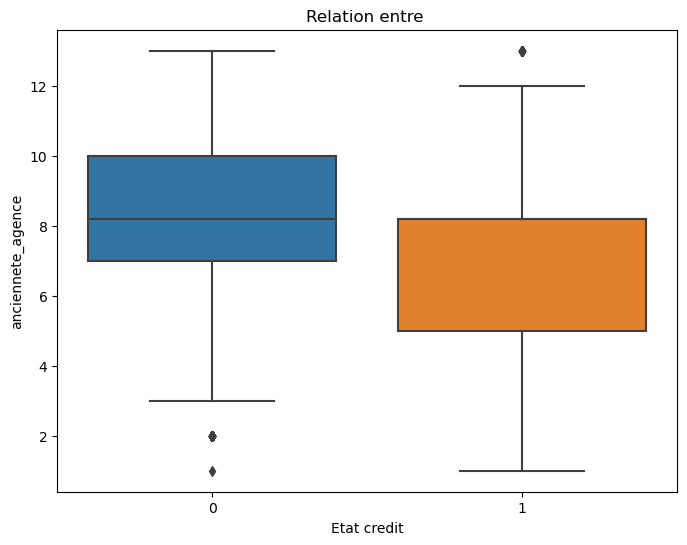

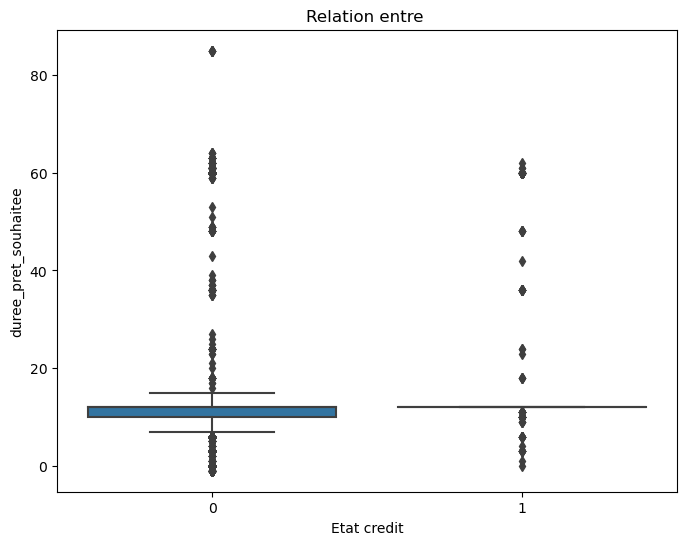

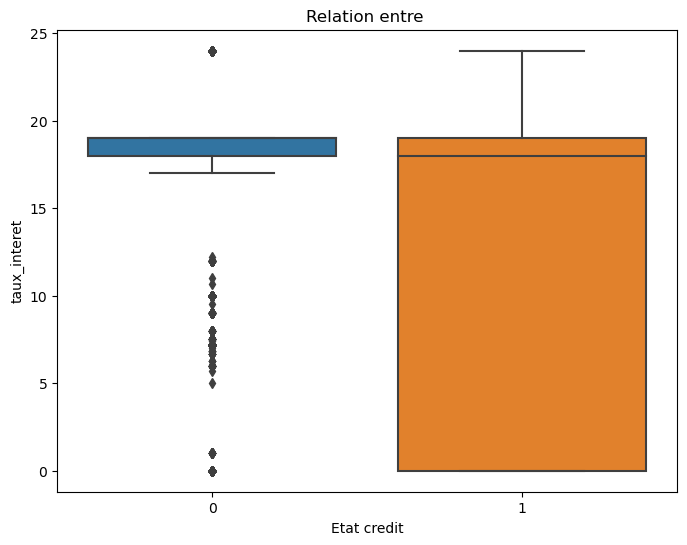

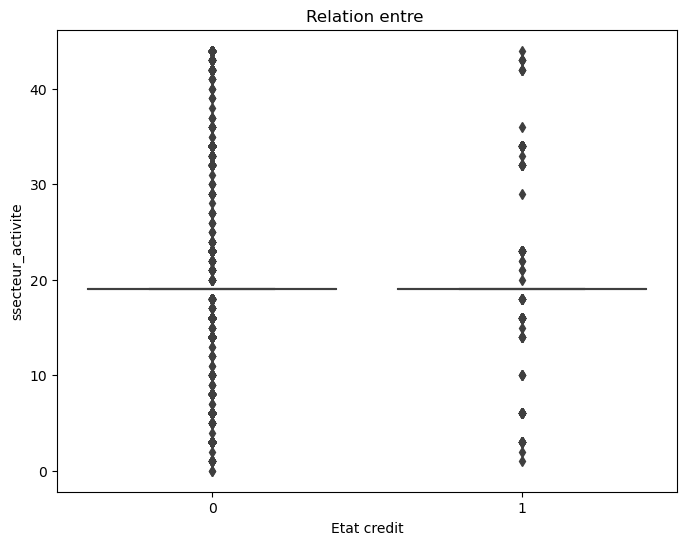

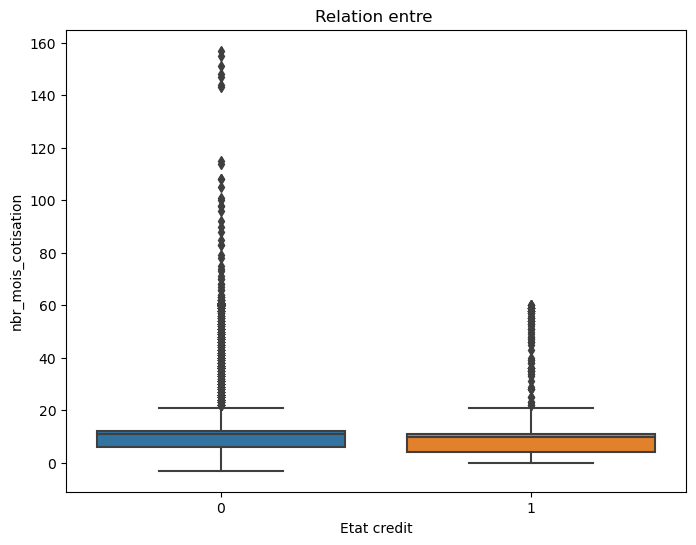

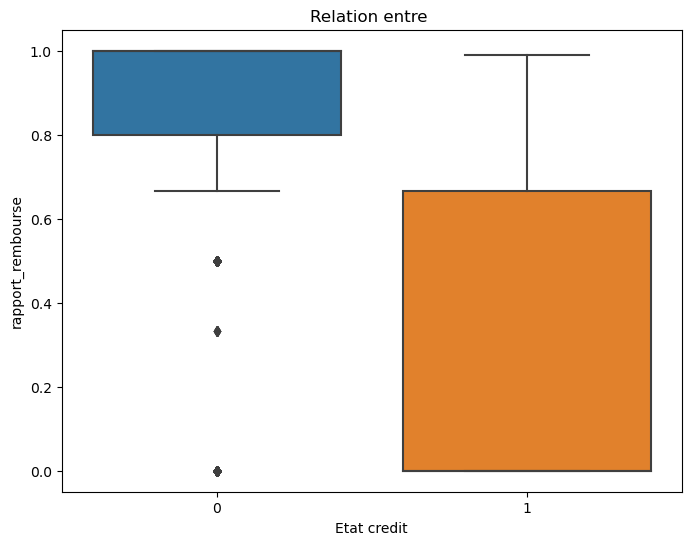

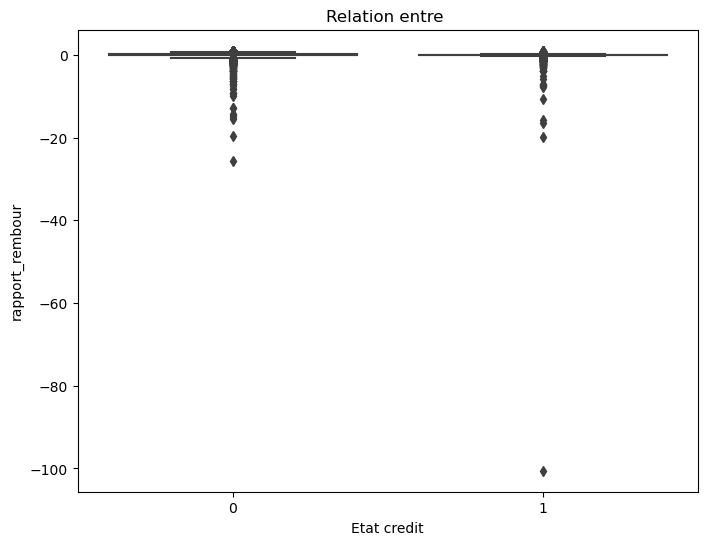

In [34]:
#plus bas j'ai eu a constaté que 
data['rapport_rembourse'] = data['nbr_credits_rembourses'] / data['nbr_credits_octroyes'].replace(0, 1)
data['rapport_rembour'] = ((data['montant_credits_accorde']/ data['nbr_credits_octroyes'].replace(0, 1)) - data['montant_sollicite'])/(data['montant_credits_accorde']/ data['nbr_credits_octroyes'].replace(0, 1))
variables_quan = [ 
    "anciennete_agence",
    "duree_pret_souhaitee",
    "taux_interet",
    "ssecteur_activite",
    "nbr_mois_cotisation",
    "rapport_rembourse",
    "rapport_rembour"
]

# Créer un boxplot de la relation entre
for ind in variables_quan:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='a_dette_encours', y=ind)
    plt.xlabel('Etat credit')
    plt.ylabel(ind)
    plt.title('Relation entre ')
    plt.show()

In [35]:
data.describe()

,r,profession,age,sexe,anciennete_agence,montant_sollicite,duree_pret_souhaitee,nbr_echeances,taux_interet,secteur_activite,ssecteur_activite,nbr_mois_cotisation,a_dette_encours,nbr_credits_octroyes,nbr_credits_rembourses,montant_credits_accorde,rapport_rembourse,rapport_rembour
count,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,1.218700e+04,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,12187.000000,1.218700e+04,12187.000000,12187.000000
mean,0.902437,4.313859,48.695495,0.390744,8.196458,9.294419e+05,13.792402,13.401658,16.388043,9.456060,19.343973,11.086171,0.155083,6.102158,5.688439,5.206469e+06,0.716857,-0.063643
std,1.150393,4.569274,14.248829,0.487937,2.479183,2.132666e+06,12.934923,13.005916,6.784363,1.995753,7.223405,11.643307,0.361999,10.370495,10.185631,1.376462e+07,0.393975,1.201479
min,0.000000,0.000000,6.000000,0.000000,1.000000,5.000000e+03,-1.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,7.000000e+03,0.000000,-100.550000
25%,0.000000,1.000000,42.000000,0.000000,7.000000,2.000000e+05,11.000000,6.000000,18.000000,9.000000,19.000000,6.000000,0.000000,1.000000,1.000000,5.000000e+05,0.666667,-0.142857
50%,0.000000,3.000000,46.000000,0.000000,8.196458,4.000000e+05,12.000000,12.000000,19.000000,9.000000,19.000000,11.000000,0.000000,4.000000,3.000000,1.500000e+06,0.923077,0.000000
75%,2.000000,4.000000,55.000000,1.000000,10.000000,9.005000e+05,12.000000,12.000000,19.000000,9.000000,19.000000,12.000000,0.000000,7.000000,7.000000,4.307000e+06,1.000000,0.165275
max,4.000000,16.000000,124.000000,1.000000,13.000000,5.000000e+07,85.000000,84.000000,24.000000,18.000000,44.000000,157.000000,1.000000,100.000000,99.000000,2.620000e+08,1.000000,0.995774


In [ ]:
#pip install lime
import lime
from lime import lime_tabular

# Création de l'explainer

explainer = lime_tabular.LimeTabularExplainer(train_X.values, 
                                              feature_names=train_X.columns.values.tolist(), 
                                              class_names=['0','1'], 
                                              verbose=True, 
                                              mode='classification')

# Choisissez un exemple spécifique à expliquer
i = 1045
exp = explainer.explain_instance(test_X.values[i], mod3.predict_proba, num_features=5)

# Afficher l'explication
exp.show_in_notebook(show_table=True)
#https://www.statcan.gc.ca/fr/science-donnees/reseau/apprentissage-explicable
#https://cedric.cnam.fr/vertigo/cours/RCP211/RCP211_TP4_Explicabilit%C3%A9.html
#

Intercept 0.250438376070083
Prediction_local [0.03525245]
Right: 0.0014225709


In [ ]:
import shap
# Initialisation du Javascript
shap.initjs()

# Création de l'explainer
explainer = shap.TreeExplainer(mod3)

# Calcul des valeurs SHAP pour les instances de test
shap_values = explainer.shap_values(test_X)

# Choisissez un exemple spécifique à expliquer
# vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], test_X.iloc[i,:])
#hap.dependence_plot("rapport_rembourse",shap_values,test_X)

In [ ]:
test_X.iloc[i,:]

In [ ]:
explainer.expected_value

In [ ]:
shap_values[i,:]

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, test_X)

In [ ]:

# Création de l'objet explainer
explainer = shap.TreeExplainer(mod3)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(train_X)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values,train_X, plot_type="bar")

# Afficher le graphique
plt.show()

In [ ]:
variables = [
    "montant_sollicite",
    "nbr_credits_octroyes",
    "duree_pret_souhaitee",
    "taux_interet",
    "secteur_activite",
    "nbr_mois_cotisation",
    "rapport_rembourse",
    "rapport_rembour"
]

shap_values_for_instance = shap_values[i, :]
total_contribution = np.sum(abs(shap_values_for_instance)) + abs(explainer.expected_value)

print("Variables avec une contribution négative :")
for index, variable in enumerate(variables):
    contribution_percent = shap_values_for_instance[index] / total_contribution * 100
    if contribution_percent < 0:
        print(f"{variable} : {abs(contribution_percent):.2f}%")

print("\nVariables avec une contribution positive :")
for index, variable in enumerate(variables):
    contribution_percent = shap_values_for_instance[index] / total_contribution * 100
    if contribution_percent > 0:
        print(f"{variable} : {abs(contribution_percent):.2f}%")


In [ ]:
shap_values[i,:]

In [ ]:
proba_test=mod3.predict_proba(test_X)

In [ ]:
proba_test[i,:]

In [ ]:
1/(1+np.exp(-1.8314601))

In [ ]:
from scipy.optimize import minimize,basinhopping
import shap
from scipy.optimize import milp
ml=mod3
test_X=pd.DataFrame(test_X)
client =test_X.iloc[[i],:]
#important_feature
important_feature = ['montant_sollicite']
def objective(feature_values):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    print("Client temporaire mis à jour :", client_temp)  # Débogage
    prob_credit_approval =  ml.predict_proba(client_temp)[:, 1]  # Probabilité de la classe 1 (accord de crédit)
    print (prob_credit_approval)
    return prob_credit_approval  # Nous voulons maximiser, donc nous minimisons l'opposé

initial_guess = client[important_feature].values.flatten()

# Contraintes (par exemple, les valeurs des caractéristiques doivent rester dans des limites réalistes)

# Optimisation
#results = minimize(objective, initial_guess, method='Nelder-Mead')

# Optimisation
results = basinhopping(objective, initial_guess)

print(results.fun)
optimal_feature_value = results.x

print("Valeurs optimales des caractéristiques importantes :", optimal_feature_value)
# Analyse du résultat
if results.success:
    print(f"Pour obtenir l'accord de crédit, vous pourriez essayer :")
    print(f"- {important_feature[0] }: {optimal_feature_value[0]:.2f} ")
    #print(f"- {important_feature[1] } : {optimal_feature_value[1]:.2f} ")
    #print(f"- {important_feature[2] } : {optimal_feature_value[2]:.2f}")
else:
    print("L'optimisation n'a pas réussi à trouver une solution.")

#COBYLA,Powell

In [ ]:
import shap
import pandas as pd
from scipy.optimize import minimize, basinhopping

ml = mod3

# Initialisation des variables de la demande
demande = pd.DataFrame({
    "montant_sollicite": [20000000],
    "duree_pret_souhaitee": [12],
    "taux_interet": [0],
    "secteur_activite": [19],
    "nbr_mois_cotisation": [18],
    "nbr_credits_octroyes": [3],
    "rapport_rembourse": [0.5],
    "rapport_rembour": [-1000]
})

variables = [
    "montant_sollicite",
    "duree_pret_souhaitee",
    "taux_interet",
    "secteur_activite",
    "nbr_mois_cotisation",
    "nbr_credits_octroyes",
    "rapport_rembourse",
    "rapport_rembour"
]

def objective(feature_values, id):
    client_temp = client.copy()
    client_temp.loc[:, important_feature] = feature_values
    print("Client temporaire mis à jour :", client_temp)  # Débogage
    prob_credit_approval = ml.predict_proba(client_temp)[:, 1]  # Probabilité de la classe 1 (accord de crédit)
    print(prob_credit_approval)
    return prob_credit_approval  # Nous voulons maximiser, donc nous minimisons l'opposé

def expliquer(demande):
    st_N = {}
    st_O = {}
    # Création de l'explainer
    explainer = shap.TreeExplainer(mod3)
    # Calcul des valeurs SHAP pour les instances de test
    shap_values = explainer.shap_values(demande)
    shap_values = shap_values[0, :]
    # Non abordables
    for i, variable in enumerate(variables):
        if shap_values[i] > 0:
            st_N[variable] = shap_values[i]
        else:
            st_O[variable] = shap_values[i]
    st_N = dict(sorted(st_N.items(), key=lambda item: item[1], reverse=True))
    st_O = dict(sorted(st_O.items(), key=lambda item: item[1]))
    return st_N, st_O

def optimiser(id, var):
    evolu = 1
    return evolu

N, O = expliquer(demande)
text_N = []
text_O = []

for variable in N:
    if variable == 'nbr_mois_cotisation':
        text_N.append("Le client ne dispose pas suffisamment d'épargne cotisée.")
    if variable == 'montant_sollicite':
        text_N.append("La somme demandée est trop grande pour cette demande.")    
    if variable == 'rapport_rembourse':
        if demande.nbr_credits_octroyes[0] != 0:
            text_N.append("Le client n'a pas entièrement payé ses crédits passés.")
        else:
            text_N.append("C'est le premier crédit demandé par ce client, faites d'autres vérifications.")
    if variable == 'rapport_rembour':
        text_N.append("Le client demande beaucoup plus que ce qu'il avait l'habitude d'emprunter.")
    if variable == 'taux_interet':
        if demande.taux_interet[0] < 18: 
            text_N.append("Taux d'intérêt inadapté.")
    if variable == 'secteur_activite':
        text_N.append("La majorité des clients de ce sous-secteur avec ces caractéristiques n'ont pas soldé.")
    if variable == 'nbr_credits_octroyes':
        if demande.nbr_credits_octroyes[0] < 3: 
             text_N.append("Pas trop de crédits à son actif.")    

for variable in O:
    if variable == 'nbr_mois_cotisation':
        text_O.append("Le client a suffisamment d'épargne cotisée pour ce crédit.")
    if variable == 'rapport_rembourse':
        if demande.nbr_credits_octroyes[0] != 0:
            text_O.append("Le client a entièrement payé ses crédits passés.")
        else:
            text_O.append("Premier crédit mais prometteur, faites d'autres vérifications.")
    if variable == 'rapport_rembour':
        text_O.append("Le client a demandé une somme qu'il avait l'habitude d'emprunter.")
    if variable == 'taux_interet':
        if demande.taux_interet[0] > 18: 
            text_O.append("Taux d'intérêt adapté.")     
    if variable == 'secteur_activite':
        text_O.append("La majorité des clients de ce sous-secteur avec ces caractéristiques ont soldé.")
    if variable == 'duree_pret_souhaitee':
        text_O.append("Durée de prêt adaptée a la demande .") 
    if variable == 'nbr_credits_octroyes':
        if demande.nbr_credits_octroyes[0] > 3: 
             text_O.append("Assez de crédits à son actif pour ne pas se tromper.")                   
            
print("Explications négatives :", text_N)            
print("Explications positives :", text_O)


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(ml, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

In [ ]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Calculer la dépendance partielle
pdp_goals, axes = partial_dependence(ml, test_X, features=['rapport_rembourse'])

# Créer le display
display = PartialDependenceDisplay.from_estimator(
    ml,
    test_X,
    features=['rapport_rembourse'],
)

# Afficher le graphique
display.plot()


In [ ]:
#

from pycebox.ice import ice, ice_plot

ice_df = ice(data=test_X, column='rapport_rembourse', predict=ml.predict)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5})
